In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
data = pd.read_csv(r"C:\Users\Karthik Shetty\Desktop\DataVisualization\Project\Play store\Data\Desktop\googleplaystore.csv")

# Convert Reviews to numeric, handling errors
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Remove any rows with NaN values in the 'Rating' or 'Reviews' columns
data.dropna(subset=['Rating', 'Reviews'], inplace=True)

# Optionally, you might want to log-transform the 'Reviews' column if it's highly skewed
data['Reviews_log'] = np.log1p(data['Reviews'])


In [3]:
# Selecting the number of clusters
k = 3  # Adjust based on your specific needs

# Features to include in the model
features = data[['Rating', 'Reviews_log']]

# Fit the k-means model
kmeans = KMeans(n_clusters=k, random_state=0).fit(features)

# Assign clusters back to our DataFrame
data['cluster'] = kmeans.labels_


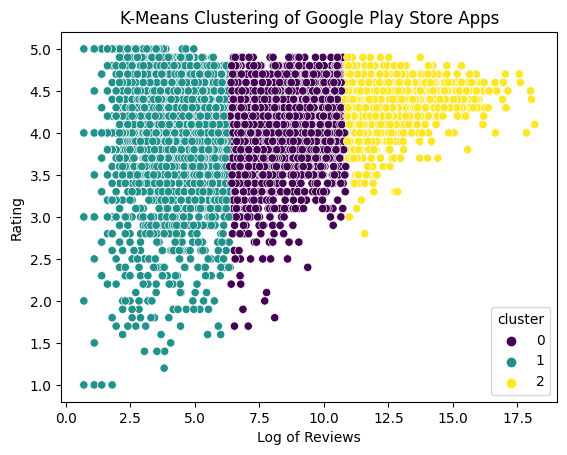

In [4]:
# Plotting
sns.scatterplot(x='Reviews_log', y='Rating', hue='cluster', data=data, palette='viridis')
plt.title('K-Means Clustering of Google Play Store Apps')
plt.xlabel('Log of Reviews')
plt.ylabel('Rating')
plt.show()


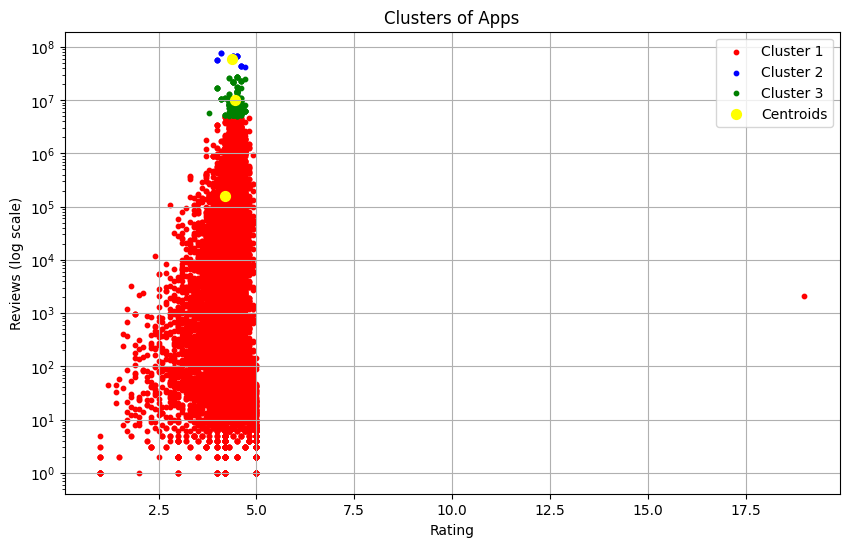

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data_path = r"C:\Users\Karthik Shetty\Desktop\DataVisualization\Project\Play store\Data\Desktop\cleaned_googleplaystore.csv"  # Replace with your actual file path
google_play_store_data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric and handle missing values
google_play_store_data['Reviews'] = pd.to_numeric(google_play_store_data['Reviews'], errors='coerce')
google_play_store_data['Rating'].fillna(google_play_store_data['Rating'].mean(), inplace=True)
google_play_store_data['Reviews'].fillna(google_play_store_data['Reviews'].median(), inplace=True)

# Data for clustering
data_for_clustering = google_play_store_data[['Rating', 'Reviews']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_for_clustering)
google_play_store_data['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    plt.scatter(data_for_clustering['Rating'][cluster_labels == i], 
                data_for_clustering['Reviews'][cluster_labels == i], 
                s=10, c=color, label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='yellow', label='Centroids')

plt.title('Clusters of Apps')
plt.xlabel('Rating')
plt.ylabel('Reviews (log scale)')
plt.yscale('log')  # Using logarithmic scale for reviews to better visualize the data
plt.legend()
plt.grid(True)
plt.show()




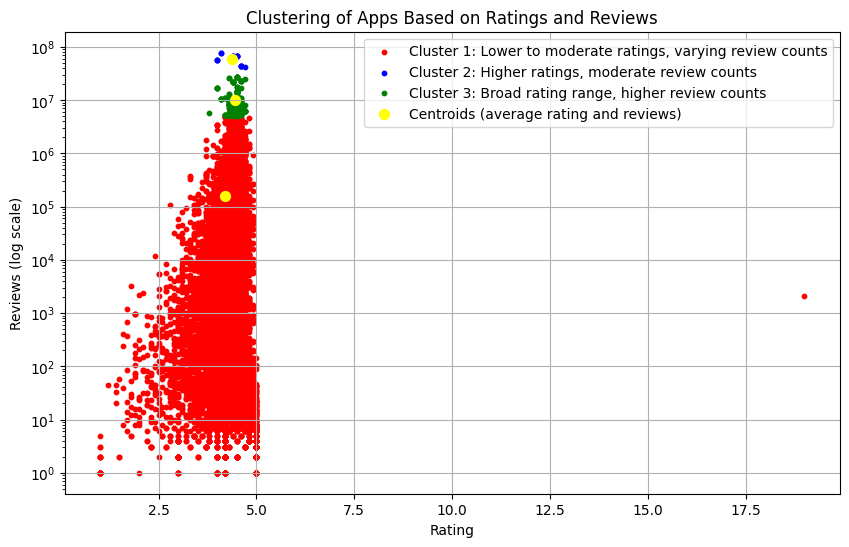

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data_path = r"C:\Users\Karthik Shetty\Desktop\DataVisualization\Project\Play store\Data\Desktop\cleaned_googleplaystore.csv"  # Replace with your actual file path
google_play_store_data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric and handle missing values
google_play_store_data['Reviews'] = pd.to_numeric(google_play_store_data['Reviews'], errors='coerce')
google_play_store_data['Rating'].fillna(google_play_store_data['Rating'].mean(), inplace=True)
google_play_store_data['Reviews'].fillna(google_play_store_data['Reviews'].median(), inplace=True)

# Data for clustering
data_for_clustering = google_play_store_data[['Rating', 'Reviews']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_for_clustering)
google_play_store_data['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
cluster_descriptions = [
    "Cluster 1: Lower to moderate ratings, varying review counts",
    "Cluster 2: Higher ratings, moderate review counts",
    "Cluster 3: Broad rating range, higher review counts"
]
for i, color in enumerate(colors):
    plt.scatter(data_for_clustering['Rating'][cluster_labels == i], 
                data_for_clustering['Reviews'][cluster_labels == i], 
                s=10, c=color, label=f'{cluster_descriptions[i]}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='yellow', label='Centroids (average rating and reviews)')

plt.title('Clustering of Apps Based on Ratings and Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews (log scale)')
plt.yscale('log')  # Using logarithmic scale for reviews to better visualize the data
plt.legend()
plt.grid(True)
plt.show()
